## Part 1

The point of this exercise is for you to write a class, that given a symbol, recognizes the symbol in a file and performs some logic specific to that symbol. The idea is that you can control how the symbol is interpretted. Once you're able to recognize a symbol and then do some logic after you recognized the symbol, then this can be generalized into recognizing different symbols that can each lead to their own different logic. 


Assume you are a part of a team writing a banking application. Your application should support performing deposits and withdrawals from accounts by using a text file that contains orders in a "human readable" form. For example, such orders might look like this:

```
gil $ 100
gil $ 500
gil $ 345
...
```
Notice that the symbol `$` could be a symbol indicating to `__deposit__` or to `__withdraw__`. The testing script we are providing you requires a different file format:

```
gil.__deposit__(100)
```

Write the implementation for a class, Magician, which should serve as a magic method "enhancer". This class should be initialized with a function name (for example `__deposit__`) and a symbol (for example `$`, and so the functionality of the class is to interpret the `$` as instructions to `__deposit__` the given amount). The class should have a method called `magic` which takes a **file name** and replaces all occurances of the symbol in the file with the function name and parenthesis containing the variable after the symbol (this is the "enhancement"). For simplicity we assume the function takes in one parameter only.

After you implemented this class, you can use the simple script you are provided with in order to use a text file to perform orders in Python code. While this is a simple exercise, note the functionality of the class can be greatly extended without any effect on the user using the class, by initializing with different (symbol, method) pairs.

In [120]:
class Magician():
    '''
    This class should have a method called 'magic' that returns
    the filename of the output file. This file is read by our
    script and you can use it for testing. This class takes as
    input a function name and a symbol.
    
    This class should have a method called magic which takes
    a filename as argument and outputs the name of the outoput
    file.
    '''
    ########## Your code starts here ##########
    
    def __init__(self, function_name, symbol):
        self.function_name = function_name
        self.symbol = symbol
    
    def magic(self, input_file):
        
        try:
            #open input and create output file
            f_input_symbol = open(input_file)
            output_operation_file_name_path = 'new_operation.txt'
            f_output_operation = open(output_operation_file_name_path, 'w') #Output list created
            
            symbol_line = f_input_symbol.readline()
            while( symbol_line ):
                #parse line
                line_split = symbol_line.split(' ')
                
                #replace symbol and apply correct format
                if (line_split[1] == self.symbol) :
                    if (line_split[2][-1::] == '\n'):
                        line_split[2] = line_split[2][0:-1]
                    operation_line = line_split[0] + '.' + self.function_name + '(' + line_split[2] + ')'
                    
                    #write to new file
                    f_output_operation.writelines(operation_line + '\n')
                
                #operate with next line
                symbol_line = f_input_symbol.readline()
            
            #close files
            f_input_symbol.close()
            f_output_operation.close()
            
            return output_operation_file_name_path
        
        except FileNotFoundError:
            print('Provided file does not exist, could not open')
            try:
                f_input_symbol.close()
                f_output_operation.close()
            except:
                #error might have been closing a file that was already closed, nothing to communicate
                pass
            exit()
        
    ##########  Your code ends here  ##########     

In [2]:
class Account():
    '''
    A simple class for testing.
    '''
    def __init__(self, initial_funds):
        self.funds = initial_funds
    
    def __deposit__(self, amount):
        assert amount>=0
        self.funds += amount

In [20]:
def use_magic(filename):
    '''
    A simple script for testing
    '''
    with open(filename) as f:
        l = f.readline()
        while(l):
            exec(l)
            l = f.readline()

In [15]:
gil = Account(1000)
print('Before magic: ', gil.funds)

Before magic:  1000


In [21]:
m = Magician('__deposit__', '$')
output_file = m.magic('input.txt')
use_magic(output_file)
print('After magic: ', gil.funds)

After magic:  1945


If implement correctly, the `exec(l)` line should use the class method `__deposit__` automatically. 

## Part 2
### Numpy image processing

In this part of the exercise you will experiment with image processing in numpy. Do not use additional imports. You can install `skimage` using the following command: `pip3 install -U scikit-image` or `conda install -c anaconda scikit-image`.

(300, 451, 3)

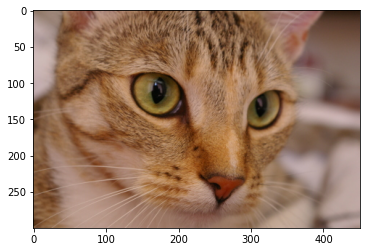

In [259]:
# Make sure this cell runs without errors.
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
image = data.chelsea()
plt.imshow(image)
image.shape

Implement the following functions (and see desired outputs and further explanations below):

1. Reduce the size of the image by a factor of 2.
1. Mirror the image horizontally.
1. Mirror the image vertically.
1. Pass a mean filter (kernel) on the image: when writing this function, think what your kernel size should be, and howmany windows (of the kernel size) you have. Use loops and figure out how each window should be accessed and what operations you need to perform on each window. Note that the image has 3 dimensions: x, y, and [r,g,b]. **This step should be implemented using no more than two loops.**

Some explanation on 4: A mean filter is used to blur an image in order to remove noise. It involves using a k x k matrix called a kernel, and applying the kernel to each k x k square in the image. Applying the kernel to a k x k square in the image results in replacing the center pixel value with the average value of the k x k square surrounding it. This process is done over the entire image where possible. So, you need to choose the dimensions of the kernel (which is a square matrix) and choose the values in the kernel that will yield the desired result.  

For example: 

If image = $\begin{bmatrix} 7 & 4 & 0 & 1 \\ 5 & 6 & 2 & 2 \\ 6 & 10 & 7 & 8 \\ 1 & 4 & 2 & 0 \end{bmatrix}$   

and kernel = `np.ones((3,3)) * 1/9`

then blurred_image = $\begin{bmatrix} 5 & 4 \\ 4 & 4 \end{bmatrix}$

However, note that the above example uses single integer values per pixel, whereas we use [r,g,b] values (where r, g, and b each get an integer from 0 to 255).

You are free to add additional cells and define as many functions as you need. Remember to think before writing a loop - there might be a `numpy` trick that does the same. **Make sure you don't change the original image while you process it.**

#### Original Image

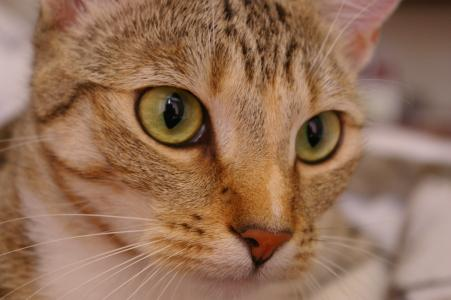

In [126]:
from IPython.display import Image
Image("chelsea.jpg")

#### 1. Reduced by a factor of 2

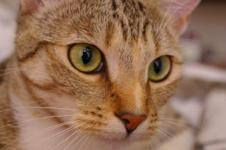

In [127]:
Image("reduced.jpg")

#### 2. Mirrored horizontally

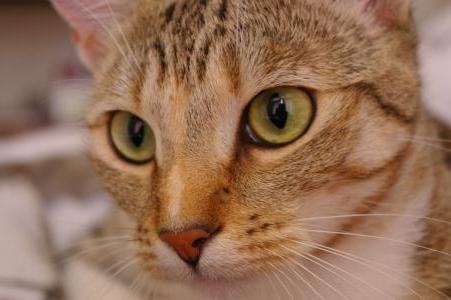

In [35]:
Image("mirror.jpg")

#### 3. Mirrored vertically

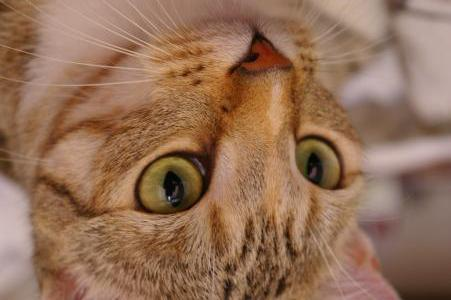

In [37]:
Image('flip.jpg')

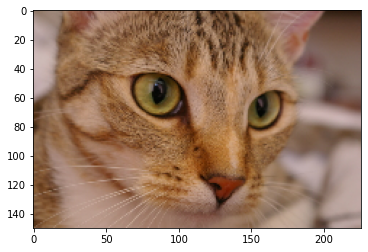

In [130]:
def reduce_size(image):
    image_reduced = np.copy(image)
    ########## take every second pixel to reduce image ##########
    image_reduced = image_reduced[0::2, 0::2, :]
    plt.imshow(image_reduced)
    ##########  Your code ends here  ##########
reduce_size(image)

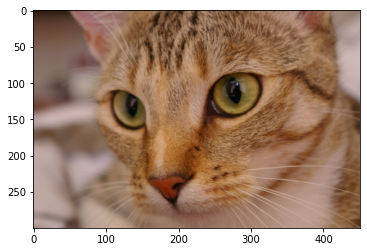

In [131]:
def mirror_horizontally(image):
    image_mirrored_horizontally = np.copy(image)
    ########## Your code starts here ##########
    image_mirrored_horizontally = image_mirrored_horizontally[:, ::-1, :]
    plt.imshow(image_mirrored_horizontally)
    ##########  Your code ends here  ##########
mirror_horizontally(image)

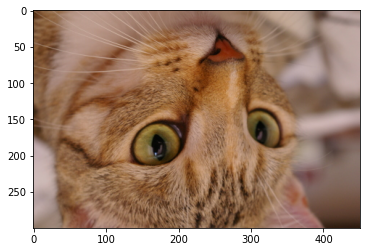

In [132]:
def mirror_vertically(image):
    image_mirrored_vert = np.copy(image)
    ########## Your code starts here ##########
    image_mirrored_vert = image_mirrored_vert[::-1, :, :]
    plt.imshow(image_mirrored_vert)
    ##########  Your code ends here  ##########
mirror_vertically(image)

In [349]:
def convolve(image, kernel):
    ########## Your code starts here ##########
    #break into 3 arrays according to [r,g,b]
    red_image = np.copy(image[:,:,0])
    green_image = np.copy(image[:,:,1])
    blue_image = np.copy(image[:,:,2])

    #apply filter to each one
    filter_image_red = conv_2d(red_image,kernel)
    filter_image_green = conv_2d(green_image,kernel)
    filter_image_blue = conv_2d(blue_image,kernel)
    
    #rebuild image with 3 colours
    filtered_image = np.empty( (filter_image_red.shape[0],filter_image_red.shape[1], 3), int)
    filtered_image[:,:,0] = filter_image_red
    filtered_image[:,:,1] = filter_image_green
    filtered_image[:,:,2] = filter_image_blue
    
    return filtered_image
    ##########  Your code ends here  ##########
   

In [350]:
def conv_2d(matrix, kernel):
    #prepare flipped kernel and output image. Note that output image is reduced in shape. 
    #Border first&last row&column do not produce corresponding output element. To keep shape should pad zeros to image border.
    flip_kernel = np.flipud( np.fliplr(kernel) )
    convolved_image = np.zeros( (matrix.shape[0]-2, matrix.shape[1]-2) )
    
    kernel_x = kernel.shape[0]
    kernel_y = kernel.shape[1]
    #Iterate over input (matrix) and convolve
    #Get all possible matrixes from image with same shape than kernel.
    for x in range( matrix.shape[0] - ( kernel.shape[0]+1 ) ):
        for y in range( matrix.shape[1] - ( kernel.shape[1]+1 ) ):
            #To convolve, get each 3x3 matrix image, perform element-wise multiplication with flipped kernel and save it to output image
            convolved_image[x, y]=np.floor( (kernel * matrix[x:x+(kernel_x), y:y+(kernel_y) ]).sum() )

    scale_colors(convolved_image)
    
    return convolved_image

In [351]:
#function to scale output image to 0-255 values
def scale_colors(image):
    mask_black = (image < 0)
    mask_white = (image > 255)
    image[mask_black] = 0
    image[mask_white] = 255
    return None

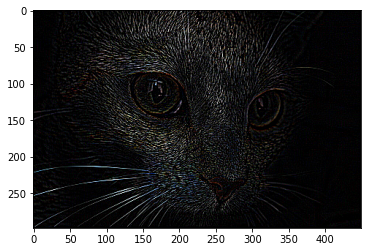

In [353]:
#test with different kernels
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
kernel_edge = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])

kernel_blur = np.ones((3, 3)) * 1/9

kernel_non_3x3 = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1],
                       [1,2,3]])

filtered_image = convolve(data.chelsea(), kernel_blur)
plt.imshow(filtered_image)


## Part 3

Given an array `X` of points in some n-dimensional space, and an additional, smaller array of points `C` (centers) in the same space, return an array `A` such that if `A[i]=j` then the i'th point is closest to the j'th center. For example: 

In [115]:
import numpy as np
from math import sqrt

X = np.array([[1,2],
              [4,4],
              [5,3],
              [3,3],
              [1,6],
              [0,1]])

C = np.array([[1,1],
              [2,3]])

A = np.array([0, 1, 1, 1, 1, 0])

You should use Euclidean distance (however you are encouraged to experiment with different distance metrics). You will encounter this functionality once you learn about the clustering algorithm known as [k-means](https://en.wikipedia.org/wiki/K-means_clustering). The following [YouTube video](https://www.youtube.com/watch?v=EEUXKG97YRw) might also help. Add as many functions and cells as you need.

In [187]:

import numpy as np
from math import sqrt

def euclidean_dist(point, centers):
    #find distance per coordinate to all possible centers coordinates (using broadcasting)
    distance_to_each_center = point - centers
    #calculate euclidean distance to each center
    distances = np.sqrt( ( (distance_to_each_center)**2 ).sum(axis=1) )
    return distances

def chebyshev_dist(point, centers):
    #find distance per coordinate to all possible centers coordinates (using broadcasting)
    distance_to_each_center = point - centers
    #chebyshev distance is the greatest of the differences along each axis 
    distances =  np.absolute( distance_to_each_center ).max(axis=1)
    return distances 

def taxicab_dist(point, centers):
    #find distance per coordinate to all possible centers coordinates (using broadcasting)
    distance_to_each_center = point - centers
    #taxicab/manhattan distance is sum of the absolute difference of each of the cartesian coordinates 
    distances =  np.absolute( distance_to_each_center ).sum(axis=1)
    return distances 

def k_means(points, centers, distance_type = euclidean_dist):

    A = [] #output list / will be converted to np.array
    
    for i in range(len(points)):
        #per point, calculate distance to all centers
        i_th_point_distances = distance_type(points[i], centers)
        #find the closest center
        j_th_center_index = i_th_point_distances.min()
        #save it to list
        A.append( i_th_point_distances.tolist().index(j_th_center_index) )

    return(np.array(A))



In [189]:
###### TEST #####
X = np.array([[1,2],
              [4,4],
              [5,3],
              [3,3],
              [1,6],
              [0,1],
             [1,-7],
             [-1,3],
             [-3,3]])

C = np.array([[1,1],
              [2,3],
              [0,0],
              [-1,0],
             [4,2]])
#NOTE: Centers are indexed from 0 to j-1 being j the quantity of centers in array C
#by default compute with euclidean distance. To use other distances pass third argument "chebyshev_dist" or "taxicab_dist"
print('Eculidean:', k_means(X,C))
print('Chebyshev:',  k_means(X , C, chebyshev_dist) )
print('Taxicab/Manhattan:',  k_means(X , C, taxicab_dist) )

Eculidean: [0 4 4 1 1 0 2 0 3]
Chebyshev: [0 1 4 1 1 0 2 0 2]
Taxicab/Manhattan: [0 4 4 1 1 0 0 1 1]
